In [2]:
import matplotlib.pyplot as plt
import matplotlib
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist if f.name.startswith('Nanum')])

['NanumGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumGothic Eco',
 'NanumGothicOTF',
 'NanumGothicOTF',
 'NanumGothicOTF',
 'NanumGothicOTF',
 'NanumGothicOTF',
 'NanumGothicOTF',
 'NanumGothicOTF',
 'NanumGothicOTF',
 'NanumGothicOTF Eco',
 'NanumGothicOTF Eco',
 'NanumGothicOTF Eco',
 'NanumGothicOTF Eco',
 'NanumGothicOTF Eco',
 'NanumGothicOTF Eco']

In [3]:
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [9]:
import pandas as pd
kospi = pd.read_csv('data/kospi.csv', parse_dates=True, index_col='Date')
kosdaq = pd.read_csv('data/kosdaq.csv', parse_dates=True, index_col='Date')
kospi.head().index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
kospi.Close = (kospi.Close/kospi.Close[0])*100
kosdaq.Close = (kosdaq.Close/kosdaq.Close[0])*100
kosdaq.Close

In [22]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


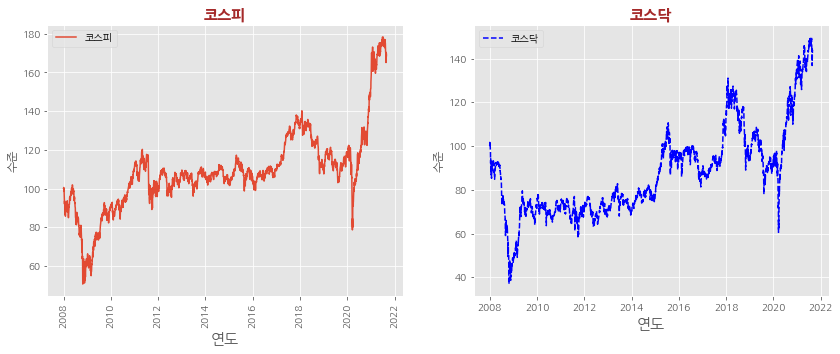

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))

plt.subplot(121)
plt.plot(kospi.index, kospi.Close, label='코스피')
plt.title("코스피", size=15, weight='bold', color='brown')
plt.xticks(rotation='vertical')
plt.xlabel('연도', size=15)
plt.ylabel('수준')
plt.legend()

plt.subplot(122)
plt.plot(kosdaq.index, kosdaq.Close, label='코스닥', color='blue', linestyle='--')
plt.title("코스닥", size=15, weight='bold', color='brown')
plt.xlabel('연도', size=15)
plt.ylabel('수준')
plt.legend()

plt.grid(True)
plt.show()

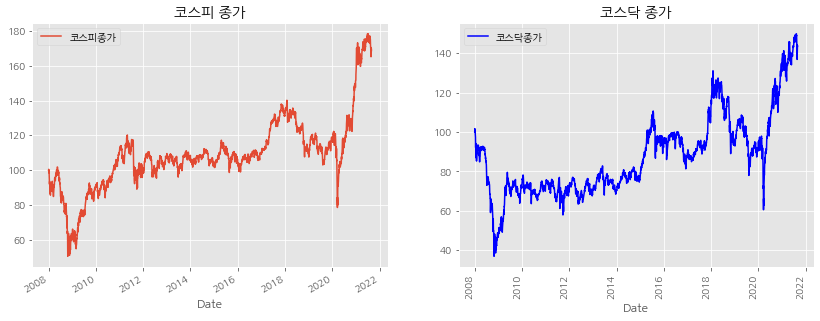

In [45]:
fig, ax = plt.subplots(1,2)
kospi.plot(y='Close', title='코스피 종가', label='코스피종가', figsize=(14,5), ax=ax[0])
kosdaq.plot(y='Close', title='코스닥 종가', label='코스닥종가', ax=ax[1], color='blue')
plt.xticks(rotation='vertical')
plt.show()

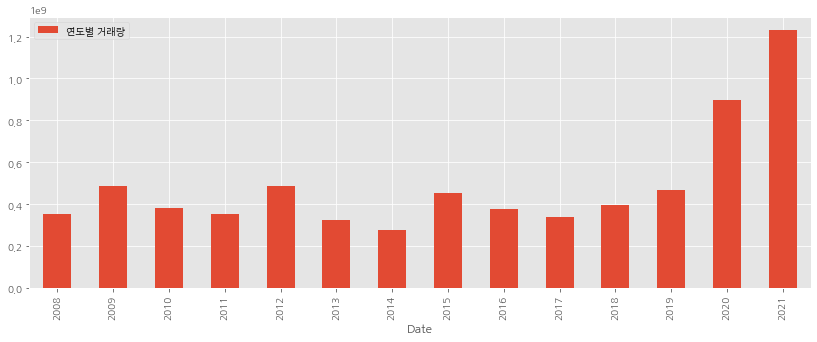

In [53]:
# volume bar char(freq = 'Y')
kospi_y_volume = kospi.Volume.resample('Y').mean()
kospi_y_volume.index = kospi_y_volume.index.year
kospi_y_volume.plot(kind='bar', figsize=(14,5), label='연도별 거래량')
plt.legend()

<AxesSubplot:xlabel='Kospi', ylabel='Kosdaq'>

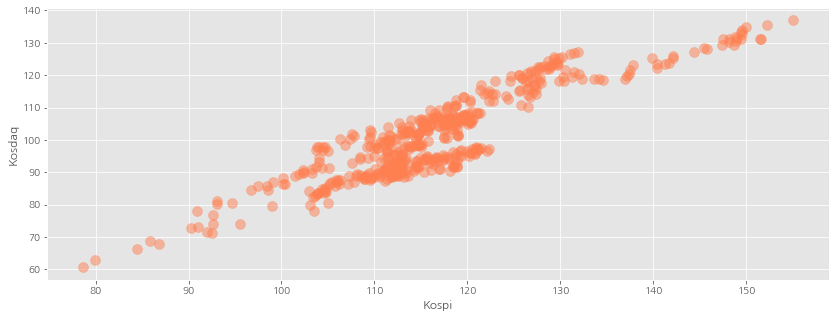

In [62]:
kospi_kosdaq = pd.concat([kospi.Close, kosdaq.Close], axis=1)
kospi_kosdaq.columns = ['Kospi', 'Kosdaq']
kospi_kosdaq.loc['2019-01-01':'2020-12-31'].plot(kind='scatter', x='Kospi', y='Kosdaq', figsize=(14,5), color='coral', s=100, alpha=0.5)

In [ ]:
kospi.Change.map(lambda x : '상승' if x>=0 else '하락')

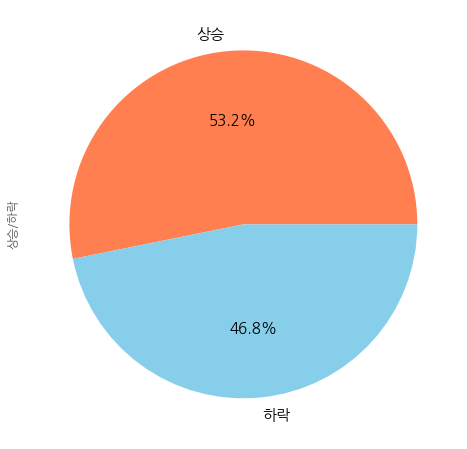

In [76]:
kospi.groupby('Change').size().plot(kind='pie',
                                    figsize=(10,8),
                                    autopct='%1.1f%%',
                                    fontsize=15,
                                    colors=['coral', 'skyblue'],
                                    label='상승/하락')
plt.show()

In [ ]:
!pip install seaborn

In [78]:
import seaborn as sns

In [80]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [79]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


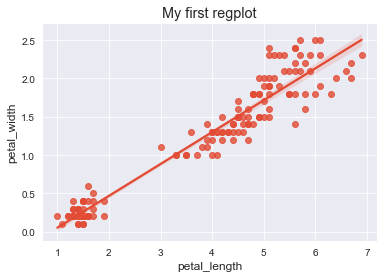

In [84]:
sns.set_style('darkgrid')
sns.regplot(x='petal_length', y='petal_width',  data=iris)
plt.title('My first regplot')
plt.show()

In [86]:
kosdaq

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,100.000000,709.07,713.52,707.12,3.812400e+05,0.0041
2008-01-03,100.972961,702.57,714.06,701.86,4.703500e+05,0.0097
2008-01-04,101.715409,716.91,719.70,711.40,4.481600e+05,0.0074
2008-01-07,100.657597,707.62,716.27,703.76,4.364600e+05,-0.0104
2008-01-08,100.309707,715.59,716.67,709.30,5.105800e+05,-0.0035
...,...,...,...,...,...,...
2021-08-20,136.879172,997.02,1000.67,964.02,1.270000e+09,-0.0235
2021-08-23,140.454237,977.87,996.23,969.48,9.935100e+08,0.0261
2021-08-24,143.282611,1002.19,1015.09,1000.72,1.330000e+09,0.0201


In [92]:
import scipy as sp

c:\Programs\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distplot')

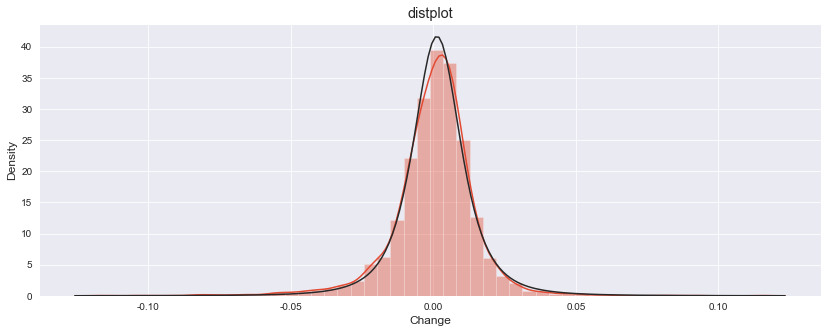

In [95]:
plt.figure(figsize=(14,5))
sns.distplot(kosdaq.Change, kde=True, fit=sp.stats.t)
plt.title('distplot')

In [ ]:
!pip install mplfinance

In [97]:
import mplfinance as mpf

In [99]:
kospi = pd.read_csv('data/kospi.csv', index_col='Date', parse_dates=True)
kospi.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,1853.45,1891.45,1892.50,1852.78,247090000.0,-0.0230
2008-01-03,1852.73,1834.44,1858.08,1821.61,253670000.0,-0.0004
2008-01-04,1863.90,1853.54,1869.76,1824.41,299080000.0,0.0060
2008-01-07,1831.14,1815.73,1840.99,1814.35,268130000.0,-0.0176
2008-01-08,1826.23,1838.64,1840.62,1818.69,296570000.0,-0.0027


In [105]:
color = mpf.make_marketcolors(up='r', down='b', inherit=True)
style = mpf.make_mpf_style(marketcolors=color)

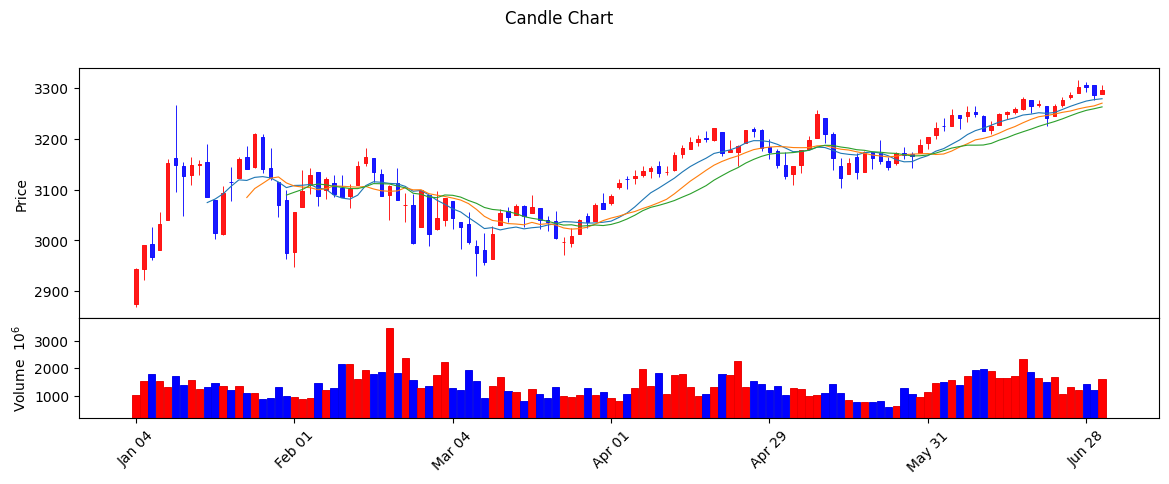

In [108]:
mpf.plot(kospi.loc['2021-01-01':'2021-06-30'], type = 'candle', figsize=(15,5),
         volume = True, title='Candle Chart', mav=(10, 15, 20), style=style)
plt.show()

In [109]:
!pip install plotly

     ---------------------------------------- 15.2/15.2 MB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install cufflinks

In [112]:
import cufflinks as cf
from plotly.offline import iplot

In [113]:
cf.go_offline(connected=True)

In [114]:
kospi

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2008-01-02,1853.45,1891.45,1892.50,1852.78,247090000.0,-0.0230
2008-01-03,1852.73,1834.44,1858.08,1821.61,253670000.0,-0.0004
2008-01-04,1863.90,1853.54,1869.76,1824.41,299080000.0,0.0060
2008-01-07,1831.14,1815.73,1840.99,1814.35,268130000.0,-0.0176
2008-01-08,1826.23,1838.64,1840.62,1818.69,296570000.0,-0.0027
...,...,...,...,...,...,...
2021-08-20,3060.51,3111.10,3122.09,3049.03,672090000.0,-0.0120
2021-08-23,3090.21,3086.81,3111.81,3064.65,570980000.0,0.0097
2021-08-24,3138.30,3119.70,3142.58,3115.23,586530000.0,0.0156


In [115]:
qplot = cf.QuantFig(kospi, title='kospi', legend='top', name='KOSPI')

In [116]:
qplot.add_volume()
qplot.add_sma(periods=20, column='Close', color='blue')
qplot.add_ema(periods=20, color='red')
qplot.iplot()